In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import requests
from functools import reduce

# Images data retrieval from API

In [162]:
response = requests.get("http://localhost:8080/api/images/")

In [163]:
print(response.json())

[{'_id': '61a65b9069add03e09e1e7df', 'type': 0, 'evaluations_list': [{'evaluation': 2}, {'evaluation': 1}, {'evaluation': 5}, {'evaluation': 2}, {'evaluation': 3}, {'evaluation': 2}, {'evaluation': 6}, {'evaluation': 1}, {'evaluation': 2}, {'evaluation': 3}, {'evaluation': 5}, {'evaluation': 5}, {'evaluation': 6}, {'evaluation': 2}, {'evaluation': 1}, {'evaluation': 1}, {'evaluation': 2}, {'evaluation': 7}, {'evaluation': 3}, {'evaluation': 7}, {'evaluation': 3}, {'evaluation': 2}, {'evaluation': 3}, {'evaluation': 2}, {'evaluation': 7}]}, {'_id': '61a65f2e69add03e09e1e7e1', 'type': 1, 'evaluations_list': [{'evaluation': 3}, {'evaluation': 5}, {'evaluation': 3}, {'evaluation': 2}, {'evaluation': 5}, {'evaluation': 2}, {'evaluation': 7}, {'evaluation': 7}, {'evaluation': 2}, {'evaluation': 2}, {'evaluation': 6}, {'evaluation': 3}, {'evaluation': 5}, {'evaluation': 6}, {'evaluation': 1}, {'evaluation': 7}, {'evaluation': 2}, {'evaluation': 6}, {'evaluation': 2}, {'evaluation': 1}, {'eval

In [164]:
# transform data retrieved in pandas dataframe
dataframe = pd.json_normalize(response.json(), ['evaluations_list'],  meta=[
    '_id',
    'type',
])
dataframe.info()
dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   evaluation  1530 non-null   int64 
 1   _id         1530 non-null   object
 2   type        1530 non-null   object
dtypes: int64(1), object(2)
memory usage: 36.0+ KB


,evaluation,_id,type
0,2,61a65b9069add03e09e1e7df,0
1,1,61a65b9069add03e09e1e7df,0
2,5,61a65b9069add03e09e1e7df,0
3,2,61a65b9069add03e09e1e7df,0
4,3,61a65b9069add03e09e1e7df,0
...,...,...,...
1525,6,61a8a03fa99916d2901b784b,1
1526,5,61a8a03fa99916d2901b784b,1
1527,7,61a8a03fa99916d2901b784b,1
1528,2,61a8a03fa99916d2901b784b,1


# Distribution of votes

In [165]:
real = dataframe.loc[dataframe['type'] == 0].groupby(['evaluation']).size().reset_index(name='counts_real')
fake = dataframe.loc[dataframe['type'] == 1].groupby(['evaluation']).size().reset_index(name='counts_gen')
print(real)
print(fake)

   evaluation  counts_real
0           1          125
1           2          191
2           3          110
3           4           42
4           5           93
5           6          106
6           7           98
   evaluation  counts_gen
0           1          76
1           2         129
2           3          90
3           4          47
4           5         119
5           6         155
6           7         149


In [166]:
evaluations = reduce(lambda left,right: pd.merge(left,right,on='evaluation',  how='outer'), [real, fake])
evaluations = evaluations.fillna(0)
evaluations['counts_gen'] = evaluations['counts_gen'].astype('int')
evaluations

,evaluation,counts_real,counts_gen
0,1,125,76
1,2,191,129
2,3,110,90
3,4,42,47
4,5,93,119
5,6,106,155
6,7,98,149


In [167]:
totGen = evaluations['counts_gen'].sum()
totReal = evaluations['counts_real'].sum()
print(totGen)
print(totReal)
evaluations['counts_gen'] = evaluations['counts_gen'].div(totGen).mul(100)
evaluations['counts_real'] = evaluations['counts_real'].div(totReal).mul(100)
#evaluations

765
765


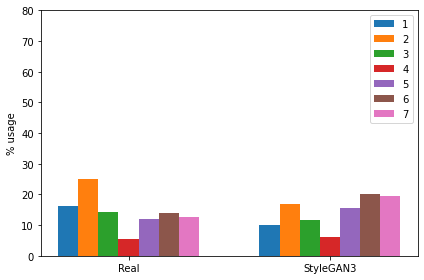

In [170]:
eval_1 = evaluations.loc[evaluations['evaluation'] == 1][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_2 = evaluations.loc[evaluations['evaluation'] == 2][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_3 = evaluations.loc[evaluations['evaluation'] == 3][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_4 = evaluations.loc[evaluations['evaluation'] == 4][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_5 = evaluations.loc[evaluations['evaluation'] == 5][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_6 = evaluations.loc[evaluations['evaluation'] == 6][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_7 = evaluations.loc[evaluations['evaluation'] == 7][['counts_real', 'counts_gen']].values.flatten().tolist()

labels = ('Real', 'StyleGAN3')
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-0.3, eval_1, width, label='1')
rects2 = ax.bar(x-0.2, eval_2, width, label='2')
rects3 = ax.bar(x-0.1, eval_3, width, label='3')
rects4 = ax.bar(x, eval_4, width, label='4')
rects5 = ax.bar(x+0.1, eval_5, width, label='5')
rects6 = ax.bar(x+0.2, eval_6, width, label='6')
rects7 = ax.bar(x+0.3, eval_7, width, label='7')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% usage')
ax.set_title('')
ax.legend()
plt.ylim(0,80)
plt.xticks(x, ['Real', 'StyleGAN3'])


fig.tight_layout()


# Realism rate calculation

In [171]:
realismReal = dataframe.loc[(dataframe['type'] == 0) & (dataframe['evaluation'] <= 3)].count()
totalReal = dataframe.loc[dataframe['type'] == 0].count()
realismReal = realismReal['_id']
print(realismReal)
totalReal = totalReal['_id']
print(totalReal)
realismRealPerc = (realismReal/totalReal)*100
realismRealPerc

426
765


55.68627450980392

In [172]:
realismGen = dataframe.loc[(dataframe['type'] == 1) & (dataframe['evaluation'] <= 3)].count()
totalGen = dataframe.loc[dataframe['type'] == 1].count()
realismGen = realismGen['_id']
print(realismGen)
totalGen = totalGen['_id']
print(totalGen)
realismGenPerc = (realismGen/totalGen)*100
realismGenPerc

295
765


38.56209150326798

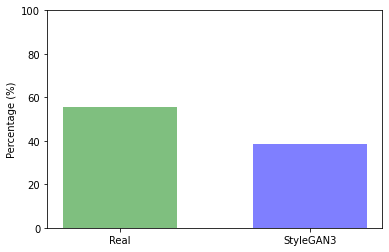

In [174]:
objects = ('Real', 'StyleGAN3')
y_pos = np.arange(len(objects))
data = [realismRealPerc, realismGenPerc]

plt.bar(y_pos, data, align='center', alpha=0.5, width=0.6, color=['green', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
#plt.title('Realism Rate')

plt.show()

# Accuracy

In [175]:
numEvalImages = dataframe.groupby(['_id','type']).size().reset_index(name='numEval')
print(numEvalImages)
numCorrectEvalReal = dataframe.loc[(dataframe['type'] == 0) & (dataframe['evaluation'] <= 3)].groupby(['_id']).size().reset_index(name='numCorrect')
print(numCorrectEvalReal)
numCorrectEvalGen = dataframe.loc[(dataframe['type'] == 1) & (dataframe['evaluation'] >= 5)].groupby(['_id']).size().reset_index(name='numCorrect')
print(numCorrectEvalGen)

                         _id  type  numEval
0   61a65b9069add03e09e1e7df     0       25
1   61a65f2e69add03e09e1e7e1     1       25
2   61a65f3669add03e09e1e7e2     1       25
3   61a899b5a99916d2901b7813     0       25
4   61a899c7a99916d2901b7814     0       25
5   61a899daa99916d2901b7815     0       25
6   61a899eba99916d2901b7816     0       25
7   61a899ffa99916d2901b7817     0       25
8   61a89a1aa99916d2901b7818     0       25
9   61a89a29a99916d2901b7819     0       25
10  61a89a39a99916d2901b781a     0       25
11  61a89a69a99916d2901b781b     0       25
12  61a89a76a99916d2901b781c     0       26
13  61a89a84a99916d2901b781d     0       26
14  61a89a8fa99916d2901b781e     0       26
15  61a89a9da99916d2901b781f     0       26
16  61a89aa7a99916d2901b7820     0       26
17  61a89bbfa99916d2901b7821     0       25
18  61a89bc9a99916d2901b7822     0       25
19  61a89bd7a99916d2901b7823     0       25
20  61a89be3a99916d2901b7824     0       25
21  61a89bf9a99916d2901b7825    

In [176]:
correct = pd.concat([numCorrectEvalReal, numCorrectEvalGen])
#correct
acc = reduce(lambda left,right: pd.merge(left,right,on='_id',  how='outer'), [numEvalImages, correct])
acc = acc.fillna(0)
acc['numCorrect'] = acc['numCorrect'].astype('int')
acc

,_id,type,numEval,numCorrect
0,61a65b9069add03e09e1e7df,0,25,17
1,61a65f2e69add03e09e1e7e1,1,25,12
2,61a65f3669add03e09e1e7e2,1,25,10
3,61a899b5a99916d2901b7813,0,25,15
4,61a899c7a99916d2901b7814,0,25,21
5,61a899daa99916d2901b7815,0,25,13
6,61a899eba99916d2901b7816,0,25,9
7,61a899ffa99916d2901b7817,0,25,13
8,61a89a1aa99916d2901b7818,0,25,3
9,61a89a29a99916d2901b7819,0,25,17


In [177]:
acc['acc'] = acc['numCorrect'].div(acc['numEval'])
print(acc)
meanAccReal = acc.loc[dataframe['type'] == 0][['acc']].mean().mul(100)
meanAccReal = meanAccReal['acc']
print(meanAccReal)
meanAccGen = acc.loc[dataframe['type'] == 1][['acc']].mean().mul(100)
meanAccGen = meanAccGen['acc']
print(meanAccGen)


                         _id  type  numEval  numCorrect       acc
0   61a65b9069add03e09e1e7df     0       25          17  0.680000
1   61a65f2e69add03e09e1e7e1     1       25          12  0.480000
2   61a65f3669add03e09e1e7e2     1       25          10  0.400000
3   61a899b5a99916d2901b7813     0       25          15  0.600000
4   61a899c7a99916d2901b7814     0       25          21  0.840000
5   61a899daa99916d2901b7815     0       25          13  0.520000
6   61a899eba99916d2901b7816     0       25           9  0.360000
7   61a899ffa99916d2901b7817     0       25          13  0.520000
8   61a89a1aa99916d2901b7818     0       25           3  0.120000
9   61a89a29a99916d2901b7819     0       25          17  0.680000
10  61a89a39a99916d2901b781a     0       25          18  0.720000
11  61a89a69a99916d2901b781b     0       25          17  0.680000
12  61a89a76a99916d2901b781c     0       26          23  0.884615
13  61a89a84a99916d2901b781d     0       26          15  0.576923
14  61a89a

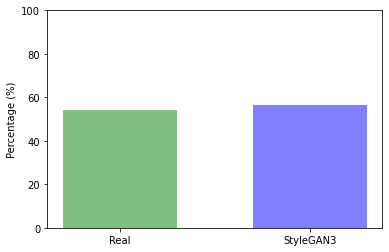

In [179]:
objects = ('Real', 'StyleGAN3')
y_pos = np.arange(len(objects))
data = [meanAccReal, meanAccGen]

plt.bar(y_pos, data, align='center', alpha=0.5, width=0.6, color=['green', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
#plt.title('Accuracy')

plt.show()

# Confidence

In [180]:
mappedDF = dataframe.copy()
mappedDF['evaluation'] = mappedDF['evaluation'].map({1:1, 2:2/3, 3:1/3, 4:0, 5:1/3, 6:2/3, 7:1})
mappedDF

,evaluation,_id,type
0,0.666667,61a65b9069add03e09e1e7df,0
1,1.000000,61a65b9069add03e09e1e7df,0
2,0.333333,61a65b9069add03e09e1e7df,0
3,0.666667,61a65b9069add03e09e1e7df,0
4,0.333333,61a65b9069add03e09e1e7df,0
...,...,...,...
1525,0.666667,61a8a03fa99916d2901b784b,1
1526,0.333333,61a8a03fa99916d2901b784b,1
1527,1.000000,61a8a03fa99916d2901b784b,1
1528,0.666667,61a8a03fa99916d2901b784b,1


In [181]:
meanConfRealImages = mappedDF.loc[mappedDF['type'] == 0].groupby(['_id']).mean()
print(meanConfRealImages)
meanConfGenImages = mappedDF.loc[mappedDF['type'] == 1].groupby(['_id']).mean()
print(meanConfGenImages)

                          evaluation
_id                                 
61a65b9069add03e09e1e7df    0.653333
61a899b5a99916d2901b7813    0.520000
61a899c7a99916d2901b7814    0.680000
61a899daa99916d2901b7815    0.546667
61a899eba99916d2901b7816    0.586667
61a899ffa99916d2901b7817    0.573333
61a89a1aa99916d2901b7818    0.640000
61a89a29a99916d2901b7819    0.600000
61a89a39a99916d2901b781a    0.613333
61a89a69a99916d2901b781b    0.586667
61a89a76a99916d2901b781c    0.743590
61a89a84a99916d2901b781d    0.679487
61a89a8fa99916d2901b781e    0.641026
61a89a9da99916d2901b781f    0.717949
61a89aa7a99916d2901b7820    0.564103
61a89bbfa99916d2901b7821    0.666667
61a89bc9a99916d2901b7822    0.680000
61a89bd7a99916d2901b7823    0.573333
61a89be3a99916d2901b7824    0.680000
61a89bf9a99916d2901b7825    0.653333
61a89c05a99916d2901b7826    0.666667
61a89c12a99916d2901b7827    0.628205
61a89c1da99916d2901b7828    0.653846
61a89c2ca99916d2901b7829    0.628205
61a89c3fa99916d2901b782a    0.666667
6

In [182]:
meanConfReal = meanConfRealImages[['evaluation']].mean().mul(100)
meanConfGen = meanConfGenImages[['evaluation']].mean().mul(100)
meanConfReal = meanConfReal['evaluation']
meanConfGen = meanConfGen['evaluation']
print(meanConfReal)
print(meanConfGen)

63.83589743589744
63.23247863247864


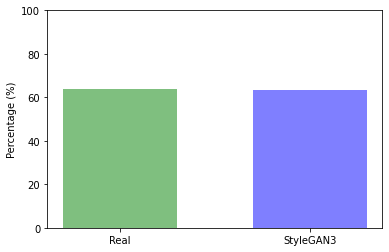

In [183]:
objects = ('Real', 'StyleGAN3')
y_pos = np.arange(len(objects))
data = [meanConfReal, meanConfGen]

plt.bar(y_pos, data, align='center', alpha=0.5, width=0.6, color=['green', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
#plt.title('Confidence')

plt.show()

# Users data retrieval from API

In [2]:
response = requests.get("http://localhost:8080/api/users/")

In [3]:
print(response.json())

[{'_id': '61b9bdd0e8a0a1ddb28f2e40', 'username': 1}, {'_id': '61b9bed0e8a0a1ddb28f2efe', 'username': 2}, {'_id': '61b9c00ce8a0a1ddb28f2fbc', 'username': 3}, {'_id': '61b9c29fe8a0a1ddb28f309b', 'username': 4}, {'_id': '61b9c393e8a0a1ddb28f3159', 'username': 5}, {'_id': '61b9c496e8a0a1ddb28f3217', 'username': 6}, {'_id': '61b9ca25e8a0a1ddb28f32d5', 'username': 7}, {'_id': '61b9cb16e8a0a1ddb28f3393', 'username': 8}, {'_id': '61b9ccede8a0a1ddb28f3451', 'username': 9}, {'_id': '61b9cf7de8a0a1ddb28f350f', 'username': 10}, {'_id': '61b9d2cfe8a0a1ddb28f35cd', 'username': 11}, {'_id': '61b9d3dae8a0a1ddb28f368b', 'username': 12}, {'_id': '61b9d4e4e8a0a1ddb28f3749', 'username': 13}, {'_id': '61b9d5ece8a0a1ddb28f3807', 'username': 14}, {'_id': '61b9d6c1e8a0a1ddb28f38c5', 'username': 15}, {'_id': '61b9d7a0e8a0a1ddb28f3983', 'username': 16}, {'_id': '61b9dcebe8a0a1ddb28f3a41', 'username': 17}, {'_id': '61b9ddd2e8a0a1ddb28f3aff', 'username': 18}, {'_id': '61b9e111e8a0a1ddb28f3bbd', 'username': 19}, {

In [5]:
usersId = pd.json_normalize(response.json());
usersId

,_id,username
0,61b9bdd0e8a0a1ddb28f2e40,1
1,61b9bed0e8a0a1ddb28f2efe,2
2,61b9c00ce8a0a1ddb28f2fbc,3
3,61b9c29fe8a0a1ddb28f309b,4
4,61b9c393e8a0a1ddb28f3159,5
5,61b9c496e8a0a1ddb28f3217,6
6,61b9ca25e8a0a1ddb28f32d5,7
7,61b9cb16e8a0a1ddb28f3393,8
8,61b9ccede8a0a1ddb28f3451,9
9,61b9cf7de8a0a1ddb28f350f,10


In [28]:
usersData = []
for index, row in usersId.iterrows():
    data = requests.get("http://localhost:8080/api/users/" + row['_id']+"/evaluations").json()
    for elem in data['real']:
        usersData.append([row['_id'], row['username'], elem['evaluations_list'][0]['evaluation'], 0])
    for elem in data['gen']:
        usersData.append([row['_id'], row['username'], elem['evaluations_list'][0]['evaluation'], 1])
usersData

[['61b9bdd0e8a0a1ddb28f2e40', 1, 1, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 7, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 6, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 6, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 2, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 3, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 3, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 7, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 2, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 6, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 1, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 6, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 5, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 3, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 7, 0],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 1, 1],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 3, 1],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 7, 1],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 2, 1],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 1, 1],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 7, 1],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 5, 1],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 7, 1],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 2, 1],
 ['61b9bdd0e8a0a1ddb28f2e40', 1, 6, 1],


In [31]:
dataframe = pd.DataFrame(usersData, columns =['user_id', 'username', 'evaluation', 'type'])
dataframe

,user_id,username,evaluation,type
0,61b9bdd0e8a0a1ddb28f2e40,1,1,0
1,61b9bdd0e8a0a1ddb28f2e40,1,7,0
2,61b9bdd0e8a0a1ddb28f2e40,1,6,0
3,61b9bdd0e8a0a1ddb28f2e40,1,6,0
4,61b9bdd0e8a0a1ddb28f2e40,1,2,0
...,...,...,...,...
1525,61ba1a06e8a0a1ddb28f537d,51,6,1
1526,61ba1a06e8a0a1ddb28f537d,51,5,1
1527,61ba1a06e8a0a1ddb28f537d,51,6,1
1528,61ba1a06e8a0a1ddb28f537d,51,1,1


In [74]:
userRealCorrect = dataframe.loc[(dataframe['type'] == 0) & (dataframe['evaluation'] <= 3)].groupby(['user_id', 'username']).size().reset_index(name='numCorrect')
print(userRealCorrect)
userGenCorrect = dataframe.loc[(dataframe['type'] == 1) & (dataframe['evaluation'] >= 5)].groupby(['user_id', 'username']).size().reset_index(name='numCorrect')
print(userGenCorrect)

                     user_id  username  numCorrect
0   61b9bdd0e8a0a1ddb28f2e40         1           7
1   61b9bed0e8a0a1ddb28f2efe         2           6
2   61b9c00ce8a0a1ddb28f2fbc         3          10
3   61b9c29fe8a0a1ddb28f309b         4           8
4   61b9c393e8a0a1ddb28f3159         5           9
5   61b9c496e8a0a1ddb28f3217         6           6
6   61b9ca25e8a0a1ddb28f32d5         7          12
7   61b9cb16e8a0a1ddb28f3393         8           7
8   61b9ccede8a0a1ddb28f3451         9          12
9   61b9cf7de8a0a1ddb28f350f        10           5
10  61b9d2cfe8a0a1ddb28f35cd        11           6
11  61b9d3dae8a0a1ddb28f368b        12           7
12  61b9d4e4e8a0a1ddb28f3749        13          10
13  61b9d5ece8a0a1ddb28f3807        14           9
14  61b9d6c1e8a0a1ddb28f38c5        15           5
15  61b9d7a0e8a0a1ddb28f3983        16           9
16  61b9dcebe8a0a1ddb28f3a41        17           6
17  61b9ddd2e8a0a1ddb28f3aff        18           5
18  61b9e111e8a0a1ddb28f3bbd   

In [75]:
correct = pd.concat([userRealCorrect, userGenCorrect])
correct

,user_id,username,numCorrect
0,61b9bdd0e8a0a1ddb28f2e40,1,7
1,61b9bed0e8a0a1ddb28f2efe,2,6
2,61b9c00ce8a0a1ddb28f2fbc,3,10
3,61b9c29fe8a0a1ddb28f309b,4,8
4,61b9c393e8a0a1ddb28f3159,5,9
...,...,...,...
46,61ba12ece8a0a1ddb28f5085,47,10
47,61ba16ebe8a0a1ddb28f5143,48,5
48,61ba1855e8a0a1ddb28f5201,49,7
49,61ba1944e8a0a1ddb28f52bf,50,5


In [76]:
results = correct.groupby(['user_id', 'username']).sum()
results

,,numCorrect
user_id,username,
61b9bdd0e8a0a1ddb28f2e40,1,14
61b9bed0e8a0a1ddb28f2efe,2,14
61b9c00ce8a0a1ddb28f2fbc,3,20
61b9c29fe8a0a1ddb28f309b,4,14
61b9c393e8a0a1ddb28f3159,5,17
61b9c496e8a0a1ddb28f3217,6,13
61b9ca25e8a0a1ddb28f32d5,7,18
61b9cb16e8a0a1ddb28f3393,8,16
61b9ccede8a0a1ddb28f3451,9,23


In [87]:
medium_score = results['numCorrect'].mean()
print(medium_score)
mean_accuracy_per_user = (medium_score/30)*100
print(mean_accuracy_per_user)

16.647058823529413
55.490196078431374


In [88]:
mappedDF = dataframe.copy()
mappedDF['evaluation'] = mappedDF['evaluation'].map({1:1, 2:2/3, 3:1/3, 4:0, 5:1/3, 6:2/3, 7:1})
mappedDF

,user_id,username,evaluation,type
0,61b9bdd0e8a0a1ddb28f2e40,1,1.000000,0
1,61b9bdd0e8a0a1ddb28f2e40,1,1.000000,0
2,61b9bdd0e8a0a1ddb28f2e40,1,0.666667,0
3,61b9bdd0e8a0a1ddb28f2e40,1,0.666667,0
4,61b9bdd0e8a0a1ddb28f2e40,1,0.666667,0
...,...,...,...,...
1525,61ba1a06e8a0a1ddb28f537d,51,0.666667,1
1526,61ba1a06e8a0a1ddb28f537d,51,0.333333,1
1527,61ba1a06e8a0a1ddb28f537d,51,0.666667,1
1528,61ba1a06e8a0a1ddb28f537d,51,1.000000,1


In [119]:
user_confidence = mappedDF.groupby(['user_id', 'username'])[['evaluation']].mean()
print(user_confidence)

                                   evaluation
user_id                  username            
61b9bdd0e8a0a1ddb28f2e40 1           0.722222
61b9bed0e8a0a1ddb28f2efe 2           0.577778
61b9c00ce8a0a1ddb28f2fbc 3           0.700000
61b9c29fe8a0a1ddb28f309b 4           0.488889
61b9c393e8a0a1ddb28f3159 5           0.388889
61b9c496e8a0a1ddb28f3217 6           0.400000
61b9ca25e8a0a1ddb28f32d5 7           0.433333
61b9cb16e8a0a1ddb28f3393 8           0.677778
61b9ccede8a0a1ddb28f3451 9           0.500000
61b9cf7de8a0a1ddb28f350f 10          0.333333
61b9d2cfe8a0a1ddb28f35cd 11          0.511111
61b9d3dae8a0a1ddb28f368b 12          0.555556
61b9d4e4e8a0a1ddb28f3749 13          0.611111
61b9d5ece8a0a1ddb28f3807 14          0.833333
61b9d6c1e8a0a1ddb28f38c5 15          1.000000
61b9d7a0e8a0a1ddb28f3983 16          0.777778
61b9dcebe8a0a1ddb28f3a41 17          0.633333
61b9ddd2e8a0a1ddb28f3aff 18          0.744444
61b9e111e8a0a1ddb28f3bbd 19          0.811111
61b9e3fbe8a0a1ddb28f3c7b 20       

In [98]:
medium_value = user_confidence['evaluation'].mean()
print(medium_value)
mean_conf_per_user = medium_value * 100
print(mean_conf_per_user)

0.6357298474945534
63.572984749455344


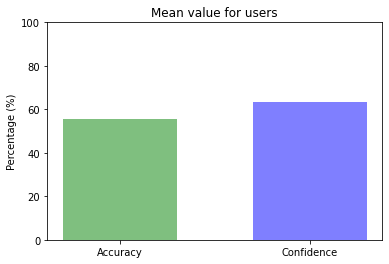

In [100]:
objects = ('Accuracy', 'Confidence')
y_pos = np.arange(len(objects))
data = [mean_accuracy_per_user, mean_conf_per_user]

plt.bar(y_pos, data, align='center', alpha=0.5, width=0.6, color=['green', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.title('Mean value for users')

plt.show()

In [78]:
distribution = results.groupby(['numCorrect']).size().reset_index(name='occurrencies')
distribution

,numCorrect,occurrencies
0,9,1
1,10,2
2,11,2
3,12,1
4,13,4
5,14,5
6,15,2
7,16,8
8,17,4
9,18,6


In [80]:
totalUsers = results.shape[0]
print(totalUsers)
distribution['occurrenciesPerc'] = distribution['occurrencies'].div(totalUsers).mul(100)
print(distribution)

51
    numCorrect  occurrencies  occurrenciesPerc
0            9             1          1.960784
1           10             2          3.921569
2           11             2          3.921569
3           12             1          1.960784
4           13             4          7.843137
5           14             5          9.803922
6           15             2          3.921569
7           16             8         15.686275
8           17             4          7.843137
9           18             6         11.764706
10          19             1          1.960784
11          20             8         15.686275
12          21             4          7.843137
13          22             2          3.921569
14          23             1          1.960784


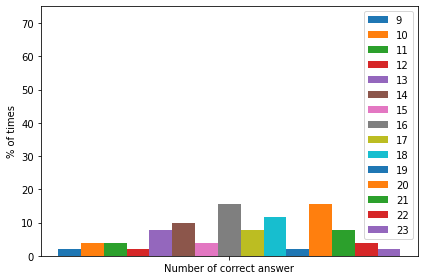

In [81]:
x = np.arange(1)  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-0.7, distribution.loc[distribution['numCorrect'] == 9][['occurrenciesPerc']].values.flatten().tolist(), width, label='9')
rects2 = ax.bar(x-0.6, distribution.loc[distribution['numCorrect'] == 10][['occurrenciesPerc']].values.flatten().tolist(), width, label='10')
rects3 = ax.bar(x-0.5, distribution.loc[distribution['numCorrect'] == 11][['occurrenciesPerc']].values.flatten().tolist(), width, label='11')
rects4 = ax.bar(x-0.4, distribution.loc[distribution['numCorrect'] == 12][['occurrenciesPerc']].values.flatten().tolist(), width, label='12')
rects5 = ax.bar(x-0.3, distribution.loc[distribution['numCorrect'] == 13][['occurrenciesPerc']].values.flatten().tolist(), width, label='13')
rects6 = ax.bar(x-0.2, distribution.loc[distribution['numCorrect'] == 14][['occurrenciesPerc']].values.flatten().tolist(), width, label='14')
rects7 = ax.bar(x-0.1, distribution.loc[distribution['numCorrect'] == 15][['occurrenciesPerc']].values.flatten().tolist(), width, label='15')
rects8 = ax.bar(x, distribution.loc[distribution['numCorrect'] == 16][['occurrenciesPerc']].values.flatten().tolist(), width, label='16')
rects9 = ax.bar(x+0.1, distribution.loc[distribution['numCorrect'] == 17][['occurrenciesPerc']].values.flatten().tolist(), width, label='17')
rects10 = ax.bar(x+0.2, distribution.loc[distribution['numCorrect'] == 18][['occurrenciesPerc']].values.flatten().tolist(), width, label='18')
rects11 = ax.bar(x+0.3, distribution.loc[distribution['numCorrect'] == 19][['occurrenciesPerc']].values.flatten().tolist(), width, label='19')
rects12 = ax.bar(x+0.4, distribution.loc[distribution['numCorrect'] == 20][['occurrenciesPerc']].values.flatten().tolist(), width, label='20')
rects13 = ax.bar(x+0.5, distribution.loc[distribution['numCorrect'] == 21][['occurrenciesPerc']].values.flatten().tolist(), width, label='21')
rects14 = ax.bar(x+0.6, distribution.loc[distribution['numCorrect'] == 22][['occurrenciesPerc']].values.flatten().tolist(), width, label='22')
rects15 = ax.bar(x+0.7, distribution.loc[distribution['numCorrect'] == 23][['occurrenciesPerc']].values.flatten().tolist(), width, label='23')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of times')
ax.set_title('')
ax.legend()
plt.ylim(0,75)
plt.xticks(x, ['Number of correct answer'])


fig.tight_layout()


## Load the questionnaire data from csv

In [184]:
questionnaire = pd.read_csv("questionnaire.csv") 
questionnaire.rename(columns={'Id used during the test':'username'}, inplace=True)
questionnaire

,Informazioni cronologiche,username,Gender,Age,Are you using glasses/lens?,Country,Strategy used,Knowledge of deep fake
0,2021/12/15 11:10:19 AM CET,1,Female,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",1
1,2021/12/15 11:15:20 AM CET,2,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
2,2021/12/15 11:19:50 AM CET,3,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",3
3,2021/12/15 11:30:24 AM CET,4,Male,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2
4,2021/12/15 11:35:22 AM CET,5,Female,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",3
5,2021/12/15 11:37:38 AM CET,6,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
6,2021/12/15 12:02:38 PM CET,7,Male,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",3
7,2021/12/15 12:05:27 PM CET,8,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",3
8,2021/12/15 12:16:15 PM CET,9,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",4
9,2021/12/15 12:25:50 PM CET,10,Female,20 - 30,Yes,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2


In [193]:
# Merge the 2 dataframe
userData = reduce(lambda left,right: pd.merge(left,right,on='username'), [results, questionnaire])
userData

,username,numCorrect,Informazioni cronologiche,Gender,Age,Are you using glasses/lens?,Country,Strategy used,Knowledge of deep fake
0,1,14,2021/12/15 11:10:19 AM CET,Female,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",1
1,2,14,2021/12/15 11:15:20 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
2,3,20,2021/12/15 11:19:50 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",3
3,4,14,2021/12/15 11:30:24 AM CET,Male,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2
4,5,17,2021/12/15 11:35:22 AM CET,Female,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",3
5,6,13,2021/12/15 11:37:38 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
6,7,18,2021/12/15 12:02:38 PM CET,Male,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",3
7,8,16,2021/12/15 12:05:27 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",3
8,9,23,2021/12/15 12:16:15 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",4
9,10,9,2021/12/15 12:25:50 PM CET,Female,20 - 30,Yes,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2


In [194]:
userData['numCorrect'] = userData['numCorrect'].div(30).mul(100)
userData.rename(columns={'numCorrect':'PercCorrect'}, inplace=True)
userData

,username,PercCorrect,Informazioni cronologiche,Gender,Age,Are you using glasses/lens?,Country,Strategy used,Knowledge of deep fake
0,1,46.666667,2021/12/15 11:10:19 AM CET,Female,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",1
1,2,46.666667,2021/12/15 11:15:20 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
2,3,66.666667,2021/12/15 11:19:50 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",3
3,4,46.666667,2021/12/15 11:30:24 AM CET,Male,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2
4,5,56.666667,2021/12/15 11:35:22 AM CET,Female,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",3
5,6,43.333333,2021/12/15 11:37:38 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
6,7,60.000000,2021/12/15 12:02:38 PM CET,Male,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",3
7,8,53.333333,2021/12/15 12:05:27 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",3
8,9,76.666667,2021/12/15 12:16:15 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",4
9,10,30.000000,2021/12/15 12:25:50 PM CET,Female,20 - 30,Yes,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2


In [195]:
userData = userData.sort_values(by=['PercCorrect'])
userData

,username,PercCorrect,Informazioni cronologiche,Gender,Age,Are you using glasses/lens?,Country,Strategy used,Knowledge of deep fake
9,10,30.000000,2021/12/15 12:25:50 PM CET,Female,20 - 30,Yes,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2
49,50,33.333333,2021/12/15 5:38:45 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
21,22,33.333333,2021/12/15 2:04:15 PM CET,Male,20 - 30,No,Italy,Hair;Artifacts;Intuition,3
37,38,36.666667,2021/12/15 4:19:26 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",1
14,15,36.666667,2021/12/15 12:55:25 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",1
29,30,40.000000,2021/12/15 2:55:34 PM CET,Male,20 - 30,Yes,Italy,"Face details (e.g., the eyes, teeth, ears, etc)",1
25,26,43.333333,2021/12/15 2:37:03 PM CET,Male,20 - 30,Yes,Italy,"General face look (e.g., the symmetry, proport...",2
5,6,43.333333,2021/12/15 11:37:38 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
17,18,43.333333,2021/12/15 1:25:17 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",4
16,17,43.333333,2021/12/15 1:21:47 PM CET,Male,20 - 30,Yes,Italy,"General face look (e.g., the symmetry, proport...",1


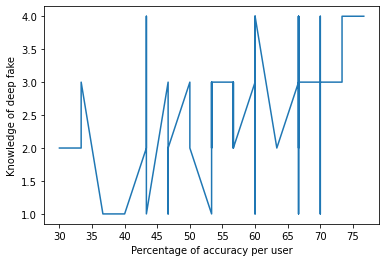

In [196]:
# Relazione tra accuracy per user e conoscenza deepfake
plt.plot(userData['PercCorrect'],userData['Knowledge of deep fake'])
#plt.title('Relationship between accuracy and knowledge')
plt.xticks(np.arange(30, 80, 5))
plt.xlabel('Percentage of accuracy per user')
plt.ylabel('Knowledge of deep fake')
plt.show()

In [197]:
# Merge the 2 dataframe
userData = reduce(lambda left,right: pd.merge(left,right,on='username'), [user_confidence, questionnaire])
userData

,username,evaluation,Informazioni cronologiche,Gender,Age,Are you using glasses/lens?,Country,Strategy used,Knowledge of deep fake
0,1,0.722222,2021/12/15 11:10:19 AM CET,Female,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",1
1,2,0.577778,2021/12/15 11:15:20 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
2,3,0.700000,2021/12/15 11:19:50 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",3
3,4,0.488889,2021/12/15 11:30:24 AM CET,Male,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2
4,5,0.388889,2021/12/15 11:35:22 AM CET,Female,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",3
5,6,0.400000,2021/12/15 11:37:38 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
6,7,0.433333,2021/12/15 12:02:38 PM CET,Male,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",3
7,8,0.677778,2021/12/15 12:05:27 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",3
8,9,0.500000,2021/12/15 12:16:15 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",4
9,10,0.333333,2021/12/15 12:25:50 PM CET,Female,20 - 30,Yes,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2


In [198]:
userData['evaluation'] = userData['evaluation'].mul(100)
userData.rename(columns={'evaluation':'PercConf'}, inplace=True)
userData

,username,PercConf,Informazioni cronologiche,Gender,Age,Are you using glasses/lens?,Country,Strategy used,Knowledge of deep fake
0,1,72.222222,2021/12/15 11:10:19 AM CET,Female,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",1
1,2,57.777778,2021/12/15 11:15:20 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
2,3,70.000000,2021/12/15 11:19:50 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",3
3,4,48.888889,2021/12/15 11:30:24 AM CET,Male,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2
4,5,38.888889,2021/12/15 11:35:22 AM CET,Female,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",3
5,6,40.000000,2021/12/15 11:37:38 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
6,7,43.333333,2021/12/15 12:02:38 PM CET,Male,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",3
7,8,67.777778,2021/12/15 12:05:27 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",3
8,9,50.000000,2021/12/15 12:16:15 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",4
9,10,33.333333,2021/12/15 12:25:50 PM CET,Female,20 - 30,Yes,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2


In [199]:
userData = userData.sort_values(by=['PercConf'])
userData

,username,PercConf,Informazioni cronologiche,Gender,Age,Are you using glasses/lens?,Country,Strategy used,Knowledge of deep fake
9,10,33.333333,2021/12/15 12:25:50 PM CET,Female,20 - 30,Yes,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2
4,5,38.888889,2021/12/15 11:35:22 AM CET,Female,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",3
5,6,40.000000,2021/12/15 11:37:38 AM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",2
21,22,43.333333,2021/12/15 2:04:15 PM CET,Male,20 - 30,No,Italy,Hair;Artifacts;Intuition,3
6,7,43.333333,2021/12/15 12:02:38 PM CET,Male,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",3
38,39,43.333333,2021/12/15 4:24:21 PM CET,Female,< 20,No,Italy,Intuition;Experience,2
45,46,46.666667,2021/12/15 5:09:47 PM CET,Female,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",3
23,24,46.666667,2021/12/15 2:16:37 PM CET,Male,20 - 30,Yes,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2
3,4,48.888889,2021/12/15 11:30:24 AM CET,Male,20 - 30,No,Italy,"Face details (e.g., the eyes, teeth, ears, etc...",2
37,38,48.888889,2021/12/15 4:19:26 PM CET,Male,20 - 30,No,Italy,"General face look (e.g., the symmetry, proport...",1


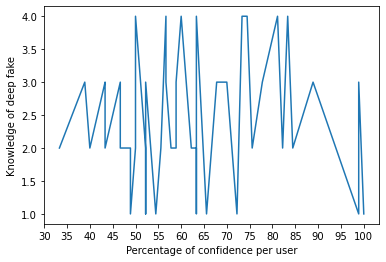

In [200]:
# Relazione tra conf per user e conoscenza deepfake
plt.plot(userData['PercConf'],userData['Knowledge of deep fake'])
#plt.title('Relationship between confidence and knowledge')
plt.xticks(np.arange(30, 105, 5))
plt.xlabel('Percentage of confidence per user')
plt.ylabel('Knowledge of deep fake')
plt.show()

In [144]:
male = questionnaire.loc[questionnaire['Gender'] == 'Male'].groupby(['Gender']).size()
male = male['Male']
female = questionnaire.loc[questionnaire['Gender'] == 'Female'].groupby(['Gender']).size()
female = female['Female']

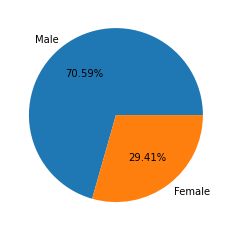

In [150]:
users = [male, female]
users

mylabels = ["Male", "Female"]

plt.pie(users, labels=mylabels,  autopct='%1.2f%%')
plt.show() 

In [155]:
venti = questionnaire.loc[questionnaire['Age'] == '< 20'].groupby(['Age']).size()
venti = venti['< 20']
trenta = questionnaire.loc[questionnaire['Age'] == '20 - 30'].groupby(['Age']).size()
trenta = trenta['20 - 30']
quaranta = questionnaire.loc[questionnaire['Age'] == '31 - 40'].groupby(['Age']).size()
quaranta = quaranta['31 - 40']

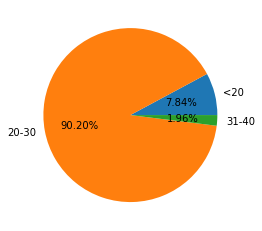

In [156]:
users = [venti, trenta, quaranta]
users

mylabels = ["<20", "20-30", "31-40"]

plt.pie(users, labels=mylabels,  autopct='%1.2f%%')
plt.show() 

In [158]:
glasses = questionnaire.loc[questionnaire['Are you using glasses/lens?'] == 'Yes'].groupby(['Are you using glasses/lens?']).size()
glasses = glasses["Yes"]
no_glasses = questionnaire.loc[questionnaire['Are you using glasses/lens?'] == 'No'].groupby(['Are you using glasses/lens?']).size()
no_glasses = no_glasses["No"]

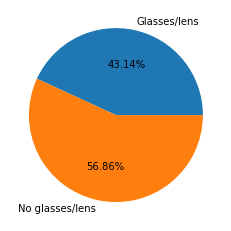

In [161]:
users = [glasses, no_glasses]
users

mylabels = ["Glasses/lens", "No glasses/lens"]

plt.pie(users, labels=mylabels,  autopct='%1.2f%%')
plt.show() 